<h1><b>📌 Introduction</b></h1>
This project analyzes a real-world Airbnb dataset to build a dynamic pricing recommendation engine for short-term rental properties. The goal is to help Airbnb hosts optimize their listing prices based on data-driven insights from features like location, property type, guest capacity, reviews, and amenities. By training regression models on key listing attributes, the system predicts the ideal log-transformed nightly price for each listing.

Below is a description of the key features in the dataset:

<ul> <li><b>log_price</b>: Log-transformed price used as the target variable for regression modeling.</li> <li><b>city</b>: The geographical location of the Airbnb listing (e.g., New York, DC, SF).</li> <li><b>room_type</b>: Type of rental space (e.g., Entire home, Private room).</li> <li><b>accommodates</b>: Maximum number of guests the property can host.</li> <li><b>number_of_reviews</b>: Total guest reviews—a proxy for listing popularity.</li> <li><b>review_scores_rating</b>: Average guest satisfaction rating.</li> <li><b>amenities</b>: Available facilities (Wi-Fi, kitchen, AC, etc.).</li> <li><b>bedrooms, beds, bathrooms</b>: Core amenities contributing to perceived value.</li> <li><b>host_identity_verified</b>: Indicates whether the host has verified their identity.</li> </ul>
The objective is to use machine learning to estimate the optimal log price and provide practical pricing suggestions for hosts in various markets.

# Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

#  Load the Dataset

In [3]:
df = pd.read_csv('/content/Airbnb_Data.csv')
print("Dataset loaded successfully.")

Dataset loaded successfully.


# Basic Checks

In [4]:
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,t,t,NaN,2012-03-26,f,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,2017-08-05,t,f,100%,2017-06-19,t,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,2017-04-30,t,t,100%,2016-10-25,t,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,This light-filled home-away-from-home is super...,NaN,t,t,NaN,2015-04-19,f,NaN,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,"Cool, cozy, and comfortable studio located in ...",2015-05-12,t,t,100%,2015-03-01,t,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [5]:
print("Dataset Shape:", df.shape)

Dataset Shape: (74111, 29)


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [7]:
df.dtypes

,0
id,int64
log_price,float64
property_type,object
room_type,object
amenities,object
accommodates,int64
bathrooms,float64
bed_type,object
cancellation_policy,object
cleaning_fee,bool


# Converting to datetime

In [8]:
df['first_review'] = pd.to_datetime(df['first_review'], errors='coerce')
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')
df['host_since'] = pd.to_datetime(df['host_since'], errors='coerce')

#  Converting "t"/"f" to boolean:

In [9]:
bool_cols = ['host_has_profile_pic', 'host_identity_verified', 'instant_bookable']
for col in bool_cols:
    df[col] = df[col].map({'t': True, 'f': False})

# Converting response rate to float

In [10]:
df['host_response_rate'] = df['host_response_rate'].str.replace('%', '').astype(float)


In [11]:
df.dtypes

,0
id,int64
log_price,float64
property_type,object
room_type,object
amenities,object
accommodates,int64
bathrooms,float64
bed_type,object
cancellation_policy,object
cleaning_fee,bool


In [12]:
print(df.describe(include='all').T)

                          count unique  \
id                      74111.0    NaN   
log_price               74111.0    NaN   
property_type             74111     35   
room_type                 74111      3   
amenities                 74111  67122   
accommodates            74111.0    NaN   
bathrooms               73911.0    NaN   
bed_type                  74111      5   
cancellation_policy       74111      5   
cleaning_fee              74111      2   
city                      74111      6   
description               74111  73479   
first_review              58247    NaN   
host_has_profile_pic      73923      2   
host_identity_verified    73923      2   
host_response_rate      55812.0    NaN   
host_since                73923    NaN   
instant_bookable          74111      2   
last_review               58284    NaN   
latitude                74111.0    NaN   
longitude               74111.0    NaN   
name                      74111  73359   
neighbourhood             67239   

In [13]:
df.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [14]:
for d in df.columns:
  print(d)

id
log_price
property_type
room_type
amenities
accommodates
bathrooms
bed_type
cancellation_policy
cleaning_fee
city
description
first_review
host_has_profile_pic
host_identity_verified
host_response_rate
host_since
instant_bookable
last_review
latitude
longitude
name
neighbourhood
number_of_reviews
review_scores_rating
thumbnail_url
zipcode
bedrooms
beds


# Check for missing values

In [15]:
missing_values = df.isnull().sum().sort_values(ascending=False)
print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 host_response_rate        18299
review_scores_rating      16722
first_review              15864
last_review               15827
thumbnail_url              8216
neighbourhood              6872
zipcode                     966
bathrooms                   200
host_identity_verified      188
host_has_profile_pic        188
host_since                  188
beds                        131
bedrooms                     91
dtype: int64


#  Drop irrelevant columns

In [16]:
df.drop(['thumbnail_url', 'host_name', 'name', 'description'], axis=1, inplace=True, errors='ignore')

# Handling missing values

# Drop rows with missing target variable 'log_price'

In [17]:
df.dropna(subset=['log_price'], inplace=True)

# Fill missing numerical values with median

In [18]:
df['bathrooms'].fillna(df['bathrooms'].median(), inplace=True)
df['bedrooms'].fillna(df['bedrooms'].median(), inplace=True)
df['beds'].fillna(df['beds'].median(), inplace=True)

# Fill missing categorical values with mode

In [19]:
df['zipcode'].fillna(df['zipcode'].mode()[0], inplace=True)
df['neighbourhood'].fillna('Unknown', inplace=True)

# Feature Engineering

# Create new feature: room_capacity = accommodates * bedrooms

In [20]:
df['room_capacity'] = df['accommodates'] * df['bedrooms']

# Drop redundant columns

In [21]:
df.drop(['id'], axis=1, errors='ignore', inplace=True)

## **# Exploratory Data Analysis (EDA)**

# Distribution of log_price (Target Variable)

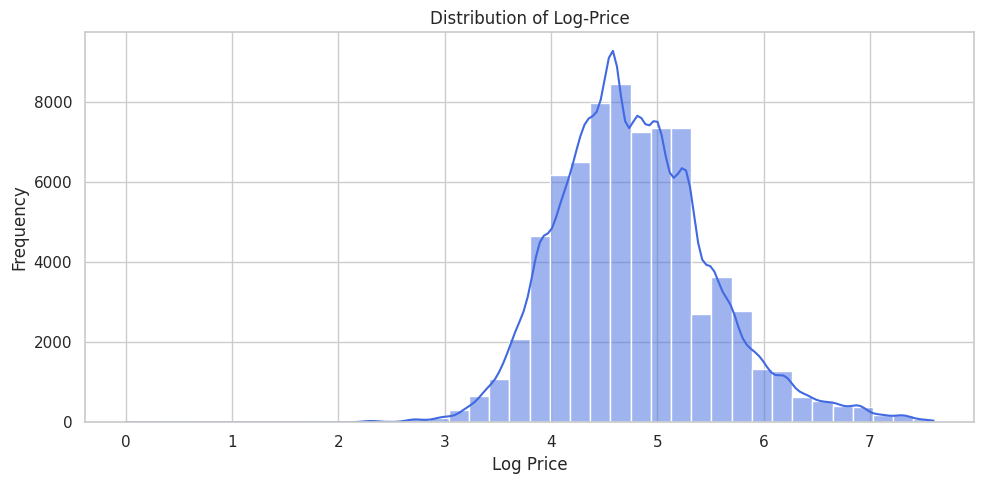

In [22]:
plt.figure(figsize=(10,5))
sns.histplot(df['log_price'], kde=True, bins=40, color='royalblue')
plt.title("Distribution of Log-Price")
plt.xlabel("Log Price")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Univariate Analysis - Room Type

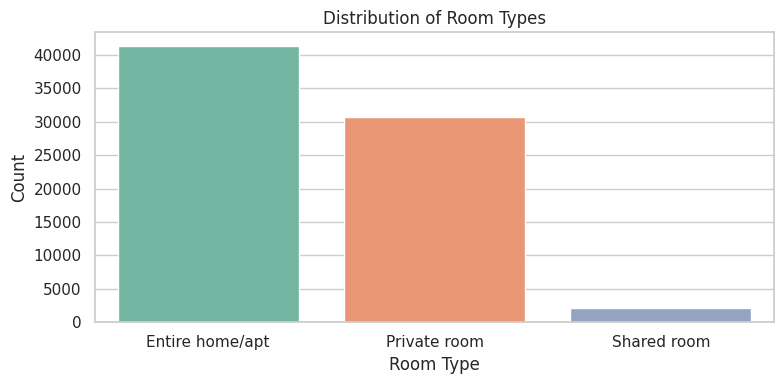

In [23]:
plt.figure(figsize=(8,4))
sns.countplot(x='room_type', data=df, palette='Set2')
plt.title("Distribution of Room Types")
plt.xlabel("Room Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Bivariate Analysis - Room Type vs Log Price

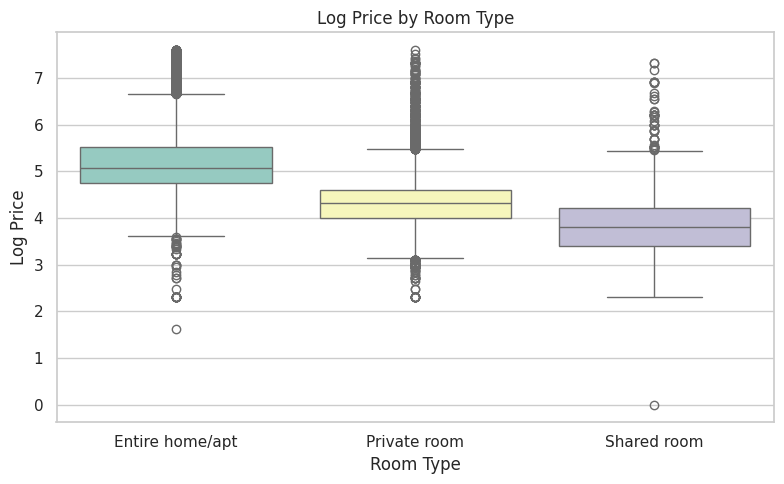

In [24]:
plt.figure(figsize=(8,5))
sns.boxplot(x='room_type', y='log_price', data=df, palette='Set3')
plt.title("Log Price by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Log Price")
plt.tight_layout()
plt.show()

# Price by Neighborhood (Top 10)

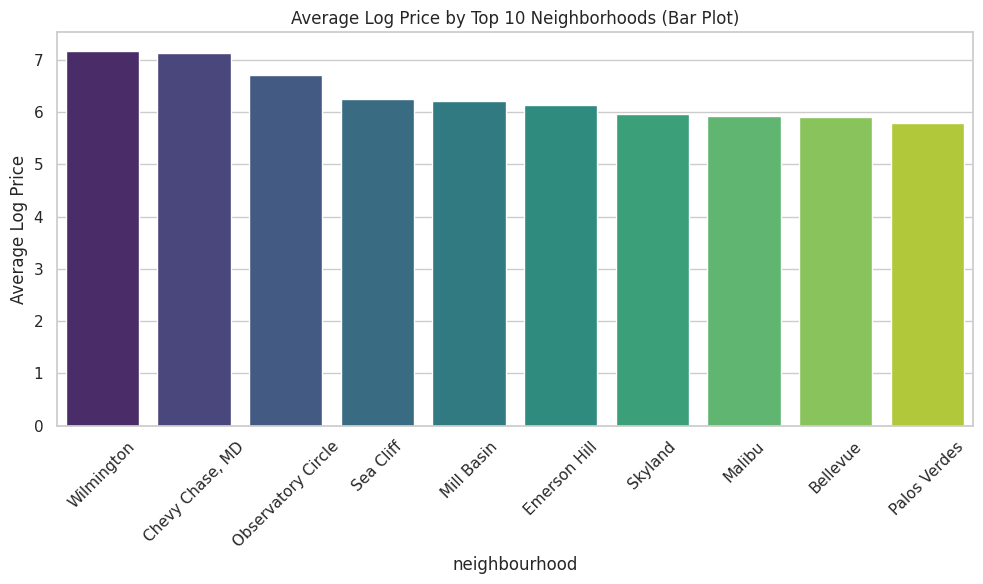

In [25]:
top_neigh = df.groupby('neighbourhood')['log_price'].mean().sort_values(ascending=False).head(10).index

avg_prices = df[df['neighbourhood'].isin(top_neigh)].groupby('neighbourhood')['log_price'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_prices.index, y=avg_prices.values, palette='viridis')
plt.xticks(rotation=45)
plt.ylabel("Average Log Price")
plt.title("Average Log Price by Top 10 Neighborhoods (Bar Plot)")
plt.tight_layout()
plt.show()

# Seasonal Trends

In [26]:
if 'last_review' in df.columns:
  df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')
  df['month'] = df['last_review'].dt.month

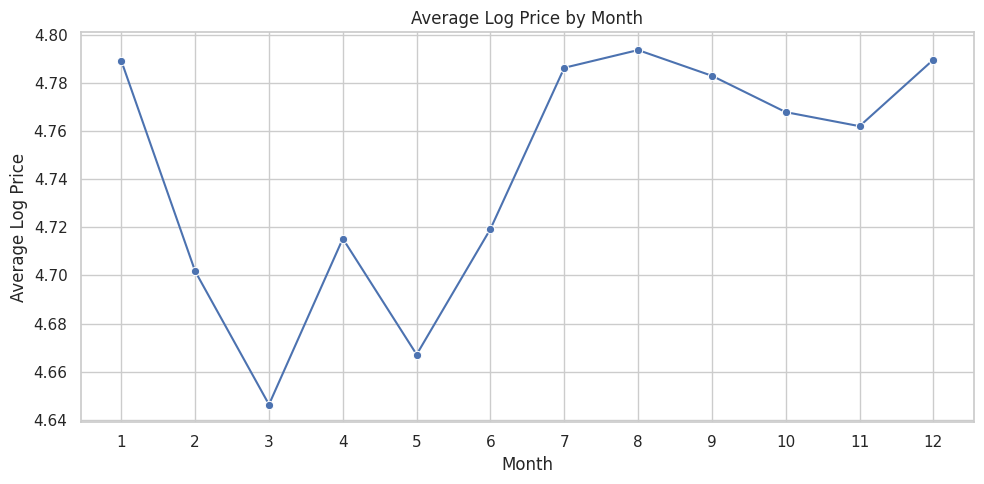

In [27]:
plt.figure(figsize=(10,5))
monthly_avg = df.groupby('month')['log_price'].mean()
sns.lineplot(x=monthly_avg.index, y=monthly_avg.values, marker='o')
plt.title('Average Log Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Log Price')
plt.xticks(ticks=range(1,13))
plt.tight_layout()
plt.show()

# Price vs Number of Reviews

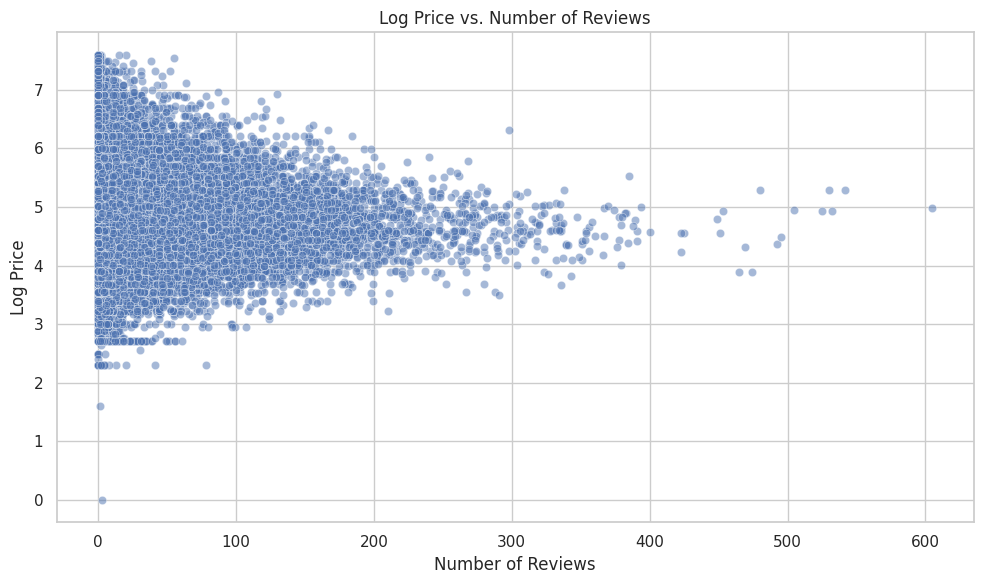

In [28]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='number_of_reviews', y='log_price', data=df, alpha=0.5)
plt.title('Log Price vs. Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Log Price')
plt.tight_layout()
plt.show()


# Pairplot of Continuous Variables

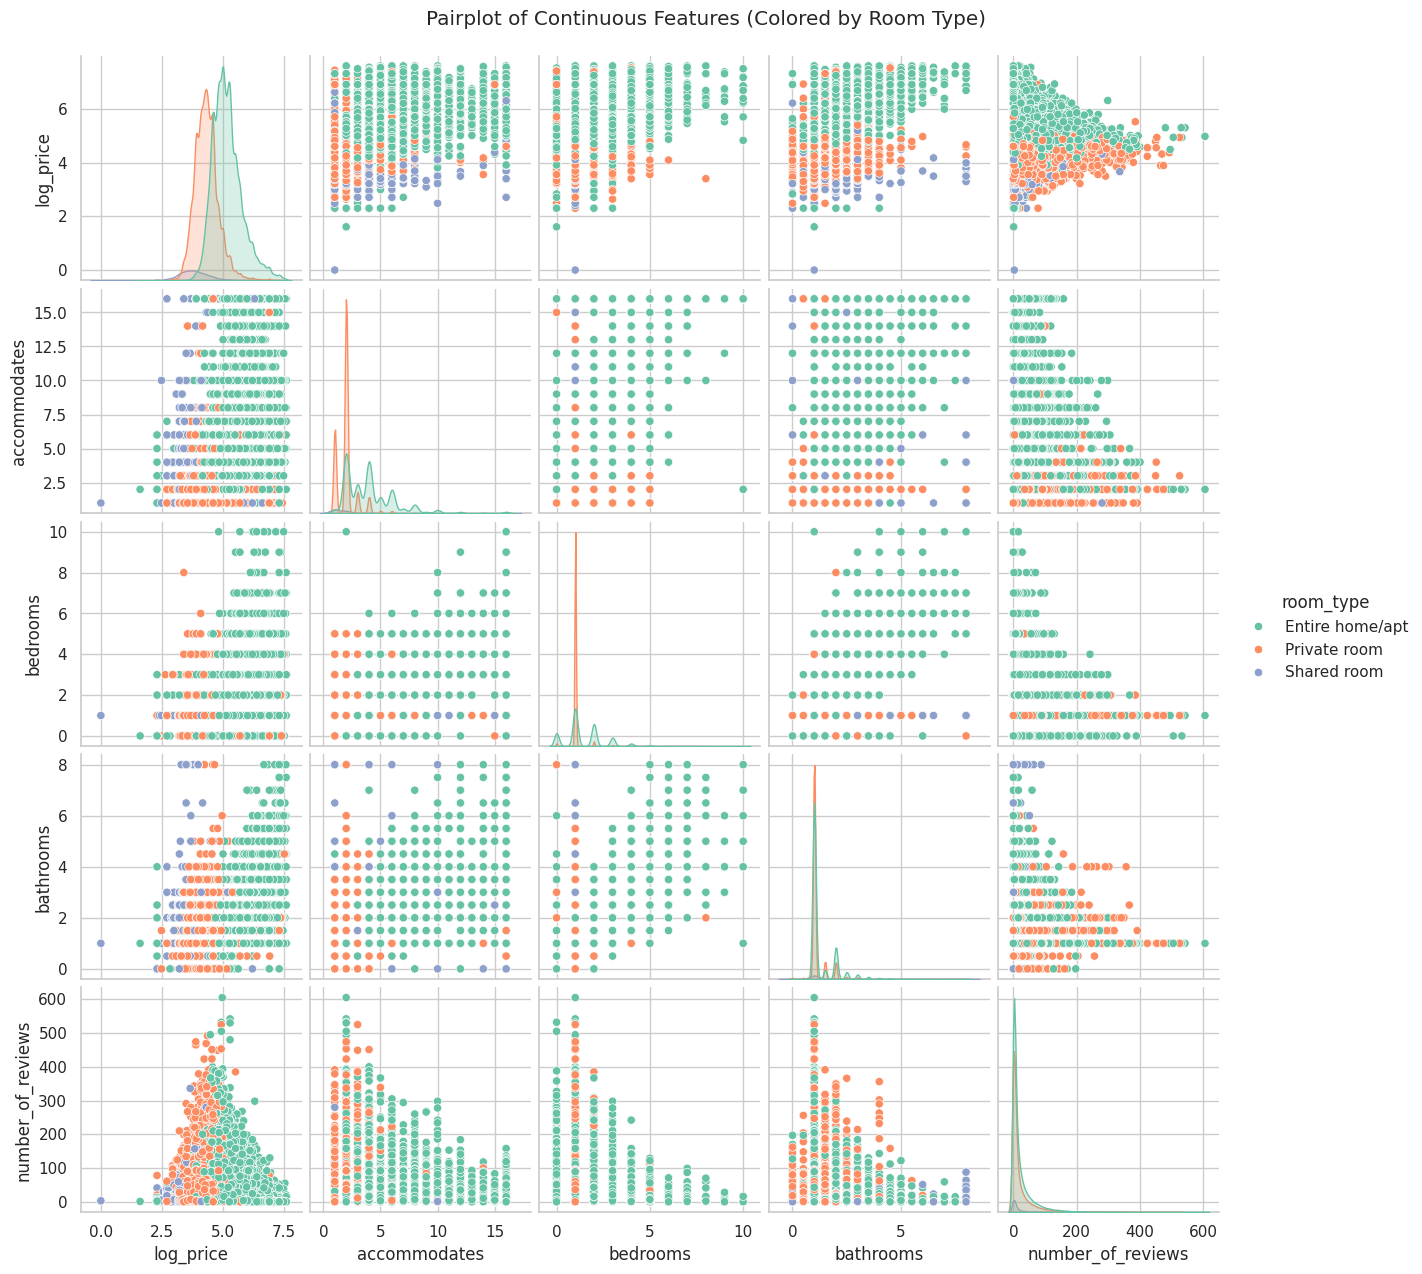

In [29]:
cont_vars = ['log_price', 'accommodates', 'bedrooms', 'bathrooms', 'number_of_reviews']
sns.pairplot(df[cont_vars + ['room_type']], hue='room_type', height=2.5, palette='Set2')
plt.suptitle("Pairplot of Continuous Features (Colored by Room Type)", y=1.02)
plt.show()

# Correlation Heatmap

# Heatmap of correlations with the target variable log_price

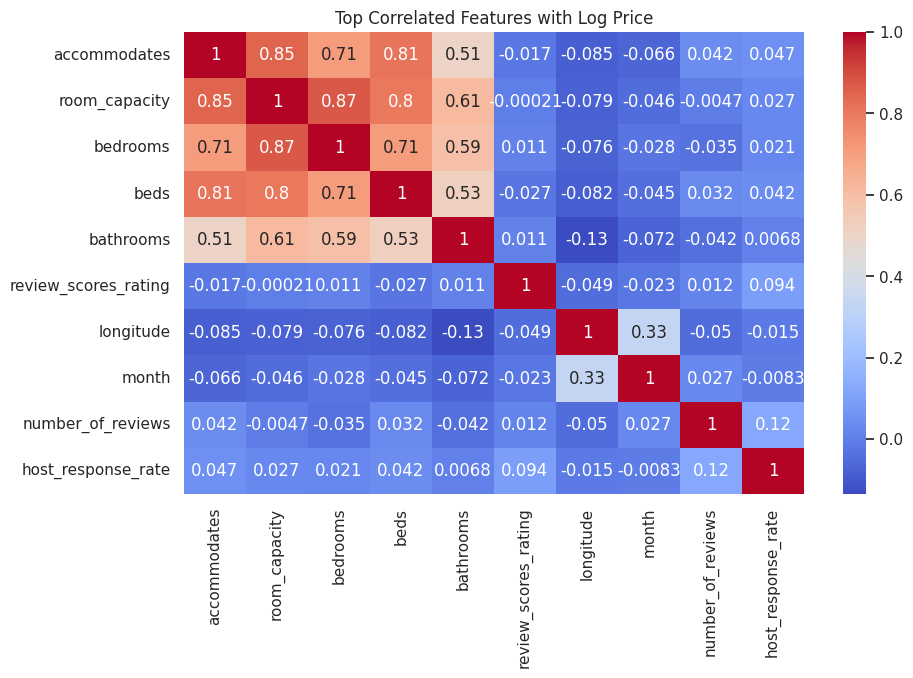

In [30]:
numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr()
top_corr = corr['log_price'].abs().sort_values(ascending=False)[1:11]
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df[top_corr.index].corr(), annot=True, cmap='coolwarm')
plt.title("Top Correlated Features with Log Price")
plt.show()

# Histogram for the 'log_price' column

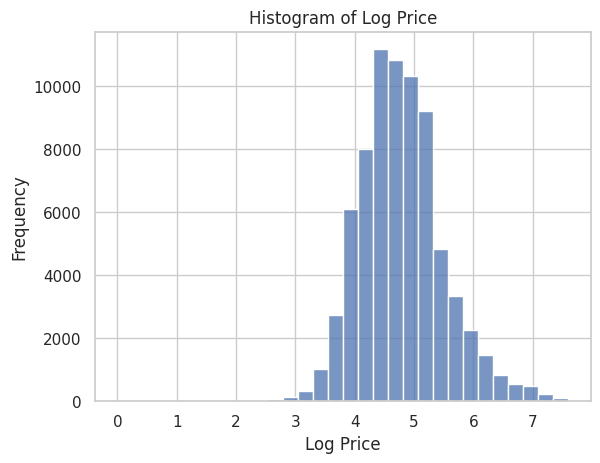

In [31]:
sns.histplot(df['log_price'], kde=False, bins=30)
plt.title('Histogram of Log Price')
plt.xlabel('Log Price')
plt.ylabel('Frequency')
plt.show()

# Feature Scaling

In [32]:
import plotly.express as px
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [33]:
median_rating = df['review_scores_rating'].median()
df['review_scores_rating'] = df['review_scores_rating'].fillna(median_rating)
print(df['review_scores_rating'].isnull().sum())

0


In [34]:
df['review_scores_rating'].fillna(df['review_scores_rating'].median(), inplace=True)
categorical_cols = df.select_dtypes(include=['object']).columns

In [35]:
df_encoded = df.copy()
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

datetime_cols = df_encoded.select_dtypes(include=['datetime64[ns]']).columns
df_encoded.drop(columns=datetime_cols, inplace=True)

In [36]:
scaler = StandardScaler()
X = df_encoded.drop('log_price', axis=1)
y = df_encoded['log_price']
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Filling NaNs in X_scaled with median values

In [37]:
X_scaled.fillna(X_scaled.median(), inplace=True)

#  Train-Test Split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model Building

# Linear Regression

In [39]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


In [40]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [41]:
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# Model Evaluation

In [42]:
model_results = {}

def evaluate_model(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    model_results[name] = {'MAE': mae, 'RMSE': rmse, 'R2': r2}

    print(f"---- {name} ----")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")

    sns.barplot(x=["MAE", "RMSE", "R²"], y=[mae, rmse, r2], palette="Set2")
    plt.title(f'{name} - Evaluation Metrics')
    plt.ylabel('Score')
    plt.tight_layout()
    plt.show()

---- Linear Regression ----
MAE: 0.3597
RMSE: 0.4830
R² Score: 0.5458


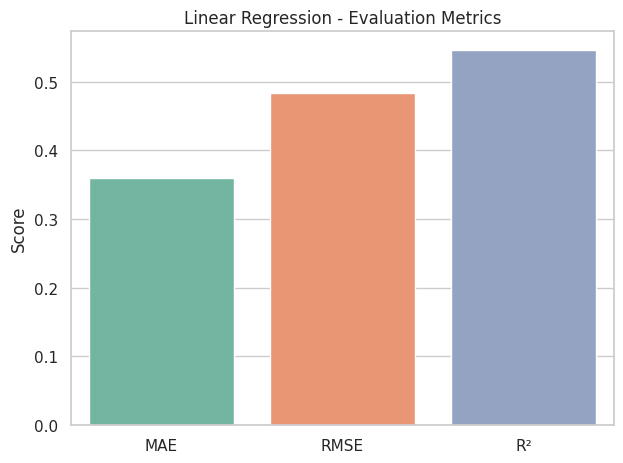

In [43]:
evaluate_model("Linear Regression", y_test, y_pred_lr)

---- Random Forest ----
MAE: 0.2819
RMSE: 0.3915
R² Score: 0.7016


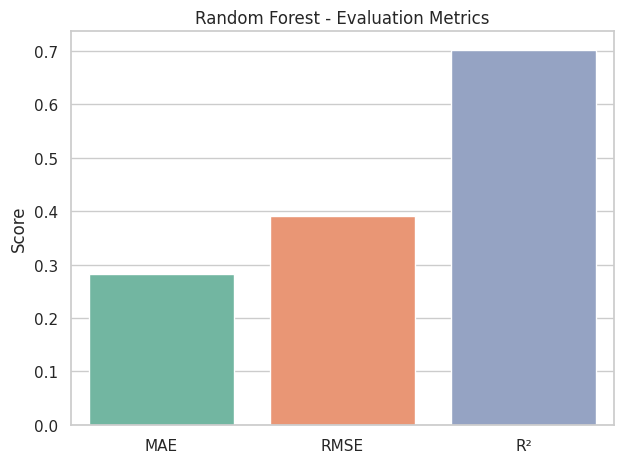

In [44]:
evaluate_model("Random Forest", y_test, y_pred_rf)

---- XGBoost ----
MAE: 0.2804
RMSE: 0.3869
R² Score: 0.7086


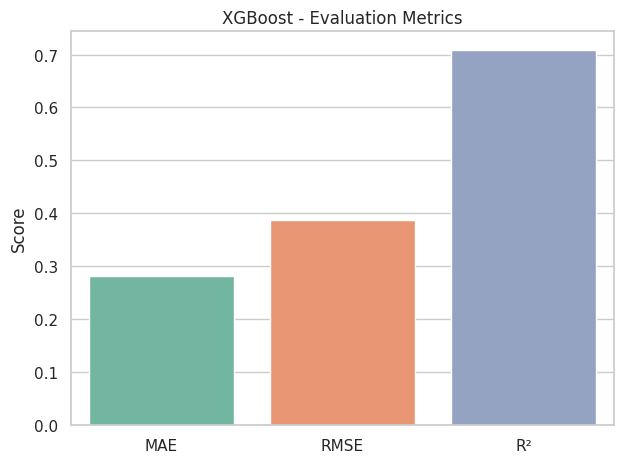

In [45]:
evaluate_model("XGBoost", y_test, y_pred_xgb)

# Find best model by R² score

In [46]:
best_model = max(model_results.items(), key=lambda x: x[1]['R2'])

print("\n Best Performing Model Based on R² Score:")
print(f"Model: {best_model[0]}")
print(f"MAE: {best_model[1]['MAE']:.4f}")
print(f"RMSE: {best_model[1]['RMSE']:.4f}")
print(f"R² Score: {best_model[1]['R2']:.4f}")


 Best Performing Model Based on R² Score:
Model: XGBoost
MAE: 0.2804
RMSE: 0.3869
R² Score: 0.7086


# Visual R² comparison

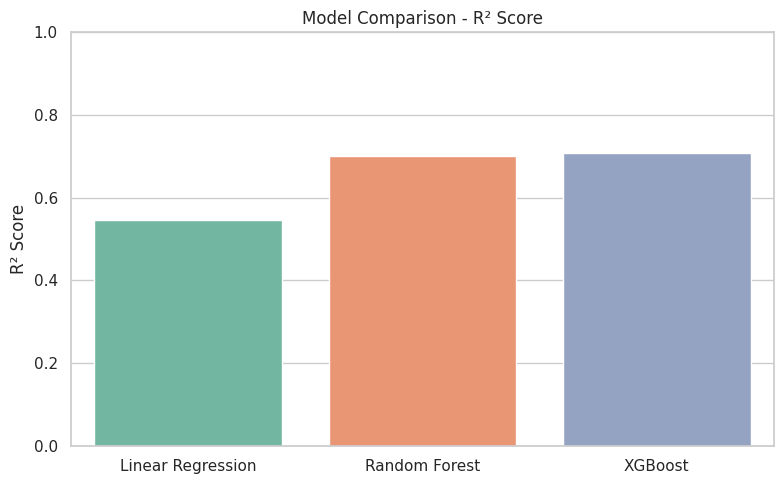

In [47]:
r2_scores = {k: v['R2'] for k, v in model_results.items()}
plt.figure(figsize=(8, 5))
sns.barplot(x=list(r2_scores.keys()), y=list(r2_scores.values()), palette="Set2")
plt.title("Model Comparison - R² Score")
plt.ylabel("R² Score")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# Feature Importance (XGBoost)

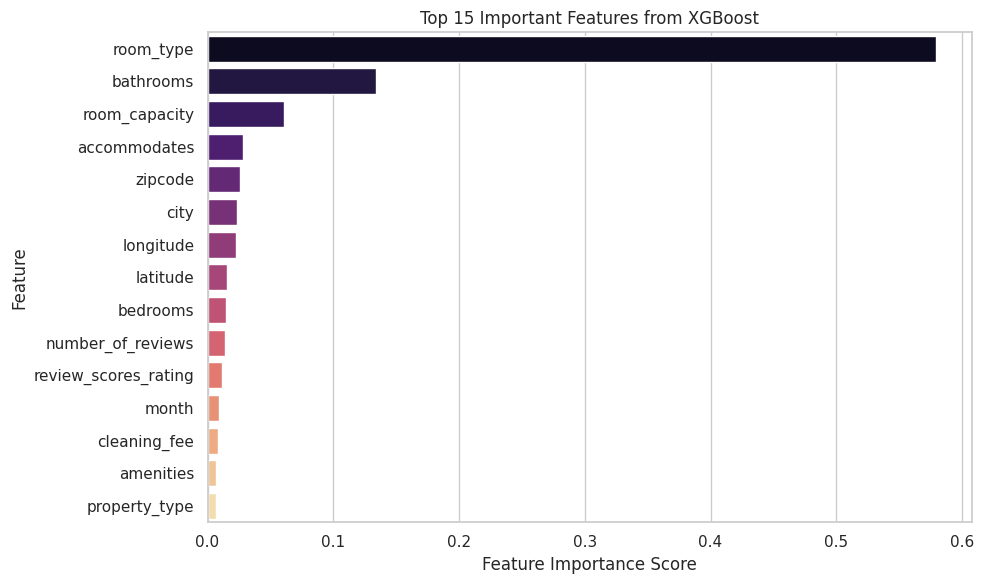

In [48]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

importances = xgb_model.feature_importances_
features = X.columns
feature_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_df.head(15), palette='magma')
plt.title('Top 15 Important Features from XGBoost')
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Residual Plot Code (for all models)

In [49]:
def plot_residuals(y_true, y_pred, model_name):
    residuals = y_true - y_pred
    plt.figure(figsize=(8, 5))
    sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red'})
    plt.title(f"{model_name} - Residual Plot")
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals (Actual - Predicted)")
    plt.axhline(0, color='black', linestyle='--', linewidth=1)
    plt.tight_layout()
    plt.show()

# Linear Regression residuals

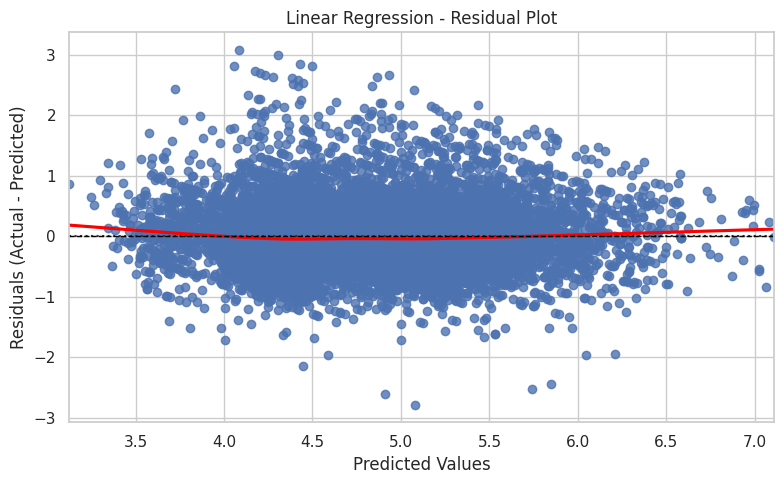

In [50]:
plot_residuals(y_test, y_pred_lr, "Linear Regression")

# Random Forest residuals

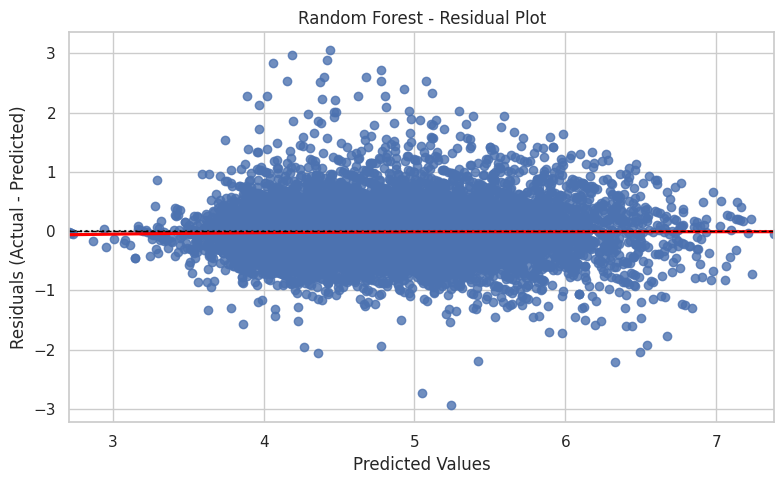

In [51]:
plot_residuals(y_test, y_pred_rf, "Random Forest")

# XGBoost residuals

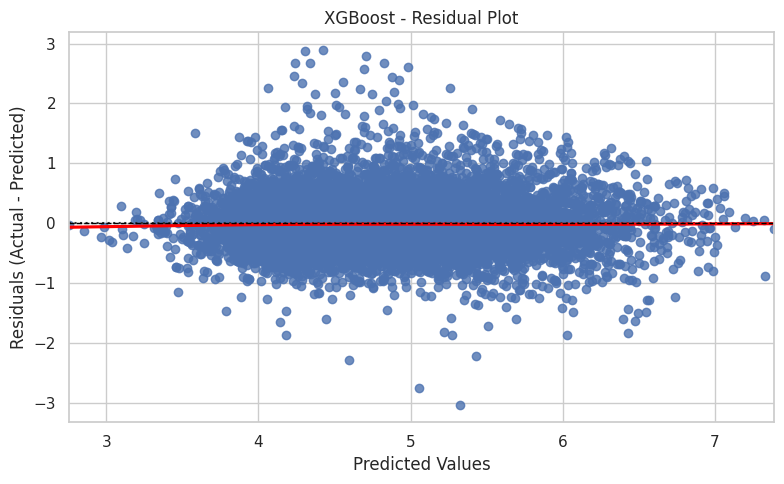

In [52]:
plot_residuals(y_test, y_pred_xgb, "XGBoost")

<h1><b>📌 Conclusion</b></h1>
The objective of this project was to build a machine learning–based pricing engine for Airbnb listings using structured data containing geographic, textual, and numerical features. We focused on predicting log-transformed listing prices using models such as Linear Regression, Random Forest, and XGBoost.

After thorough preprocessing, feature engineering, and EDA, the models were evaluated using metrics such as MAE, RMSE, and R². Feature importance from ensemble models helped interpret pricing drivers.

### 📊 Model Performance Comparison

| Model             | MAE    | RMSE   | R² Score |
|-------------------|--------|--------|----------|
| XGBoost Regressor | 0.2804 | 0.3869 | 0.7086   |
| Random Forest     | 0.2819 | 0.3915 | 0.7016   |
| Linear Regression | 0.3597 | 0.4830 | 0.5458   |


📍 <b>Key Insights:</b>

XGBoost achieved the best performance, offering the lowest MAE and highest R² score (0.71).

Random Forest followed closely behind, performing slightly worse than XGBoost.

Linear Regression underperformed, indicating the need for models that capture non-linear interactions.

Important features included room type, city, number of reviews, and review_scores_rating.


<h1><b>🚀 Future Work:</b></h1>

Add time-aware features such as seasonality, holidays, and listing age.

Incorporate NLP-based sentiment analysis from review text (if available).

Deploy the trained model as an interactive web tool using Streamlit or Flask.

Automate dashboard creation in Tableau or Power BI with real-time inputs.

